# Cel zadania
### Celem zadania jest analiza eksploracyjna oraz wykorzystanie alorytmów AI dla wybranego zbioru.

In [1]:
import numpy as np
import pandas as pd
import panel as pn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

# Przygotowanie danych
## Zbiór 'glass.csv' zawiera dane na temat 214 próbek szkła. Poniżej znajduje się tabela, w której zawarto podstawowe informacje na temat parametrów.
<br>
<br>
<table>
<tbody>
<tr>
<td>Parametr</td>
<td>Opis</td>
<td>Typ danych</td>
</tr>
<tr>
<td>RI</td>
<td>Współczynnik załamania światła (Refractive Index)</td>
<td>Liczba zmiennoprzecinkowa</td>
</tr>
<tr>
<td>Na</td>
<td>Sód - miara jednostkowa: procent wagowy w odpowiednim tlenku</td>
<td>Liczba zmiennoprzecinkowa</td>
</tr>
<tr>
<td>Mg</td>
<td>Magnez - miara jednostkowa: procent wagowy w odpowiednim tlenku</td>
<td>Liczba zmiennoprzecinkowa</td>
</tr>
<tr>
<td>Al</td>
<td>Glin - miara jednostkowa: procent wagowy w odpowiednim tlenku</td>
<td>Liczba zmiennoprzecinkowa</td>
</tr>
<tr>
<td>Si</td>
<td>Krzem - miara jednostkowa: procent wagowy w odpowiednim tlenku</td>
<td>Liczba zmiennoprzecinkowa</td>
</tr>
<tr>
<td>K</td>
<td>Potas - miara jednostkowa: procent wagowy w odpowiednim tlenku</td>
<td>Liczba zmiennoprzecinkowa</td>
</tr>
<tr>
<td>Ca</td>
<td>Wapń - miara jednostkowa: procent wagowy w odpowiednim tlenku</td>
<td>Liczba zmiennoprzecinkowa</td>
</tr>
<tr>
<td>Ba</td>
<td>Bar - miara jednostkowa: procent wagowy w odpowiednimtlenku</td>
<td>Liczba zmiennoprzecinkowa</td>
</tr>
<tr>
<td>Fe</td>
<td>Żelazo - miara jednostkowa: procent wagowy w odpowiednim tlenku</td>
<td>Liczba zmiennoprzecinkowa</td>
</tr>
<tr>
<td>Type</td>
<td>Typ szkła – zastosowanie do:<br>
- 1 okna budynku (proces produkcji „Float”)<br>
- 2 okna budynku (proces produkcji inny niż „Float”)<br>
- 3 okna pojazdu (proces produkcji „Float”)<br>
- 4* okna pojazdu (proces produkcji inny niż „Float”)<br><br>
- 5 pojemników<br>
- 6 zastaw stołowych<br>
- 7 reflektorów<br>
* typ nie występuje w danych</td>
<td>Liczba całkowita (etykieta)</td>
</tr>
</tbody>
</table>
<br>
<br>


### Pierwsze 10 wierszy zbioru:

In [2]:
df=pd.read_csv('glass.csv') # zaimportowanie zbioru
df.head(10) # wyświetlenie 10 pierwszych wierszy

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


# Analiza
### Na początku analizy, w celach orientacyjnych, zaprezentowano wykres dotyczący ilości wystąpień danego typu szkła w zbiorze.
### Łatwo można zauważyć że większość zbioru stanowi typ 1 i 2. 
### Mała liczba próbek typów 3 5 6 może negatywnie wpłynąć na analizę z wykorzystaniem metod uczenia maszynowego.
#### W analizie zastosowano palete kolorów "colorblind", ze względu na łatwiejsze rozróżnienie danych w przypadku problemów z rozpoznawaniem kolorów.

<AxesSubplot:xlabel='Type', ylabel='count'>

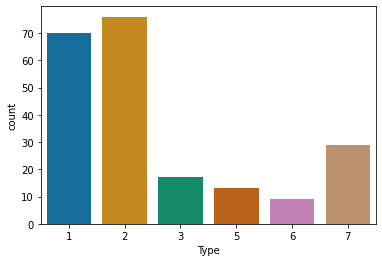

In [3]:
sns.set_palette("colorblind") # użycie palety kolorów "colorblind" domyślnie dla wszystkich wykresów
sns.countplot(x='Type', data=df)


## Następnie przedstawiono podstawowe dane statystyczne dla danych 'glass.csv' z pominięciem kolumny będącej etykietą.
## Działanie to ma na celu bardziej szczegółowe przedstawienie wszystkich danych zawartych w zbiorze.

In [4]:
df.loc[:, df.columns != 'Type'].describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### Poniższy wykres typu mapy cieplnej przedstawia korelacje pomiędzy poczszczególnymi zmiennymi zbioru.
### Z wykresu można odczytać, że niektóre zmienne w żaden sposób na siebie nie wpływają. Są to zmienne takie jak Mg i K które wykazują wartość bliską lub równą 0 dla analiz korelacji.

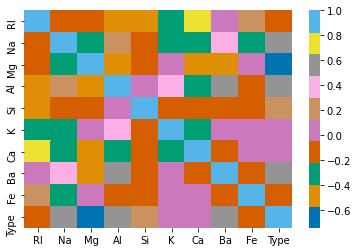

In [5]:
sns.heatmap(df.corr(method='pearson'), cmap=sns.color_palette('colorblind'));

### Poniżej zaprezentowano zestawienie parametrów zbioru - każdy z każdym z uwzględnieniem typów szkła.
### Pozwala to przedstawić czy w jakimś konkretnym wypadku można od siebie odseparować dany typ szkła (punkty danego typu odstają od pozostałch).

C:\Users\adamp\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adamp\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adamp\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


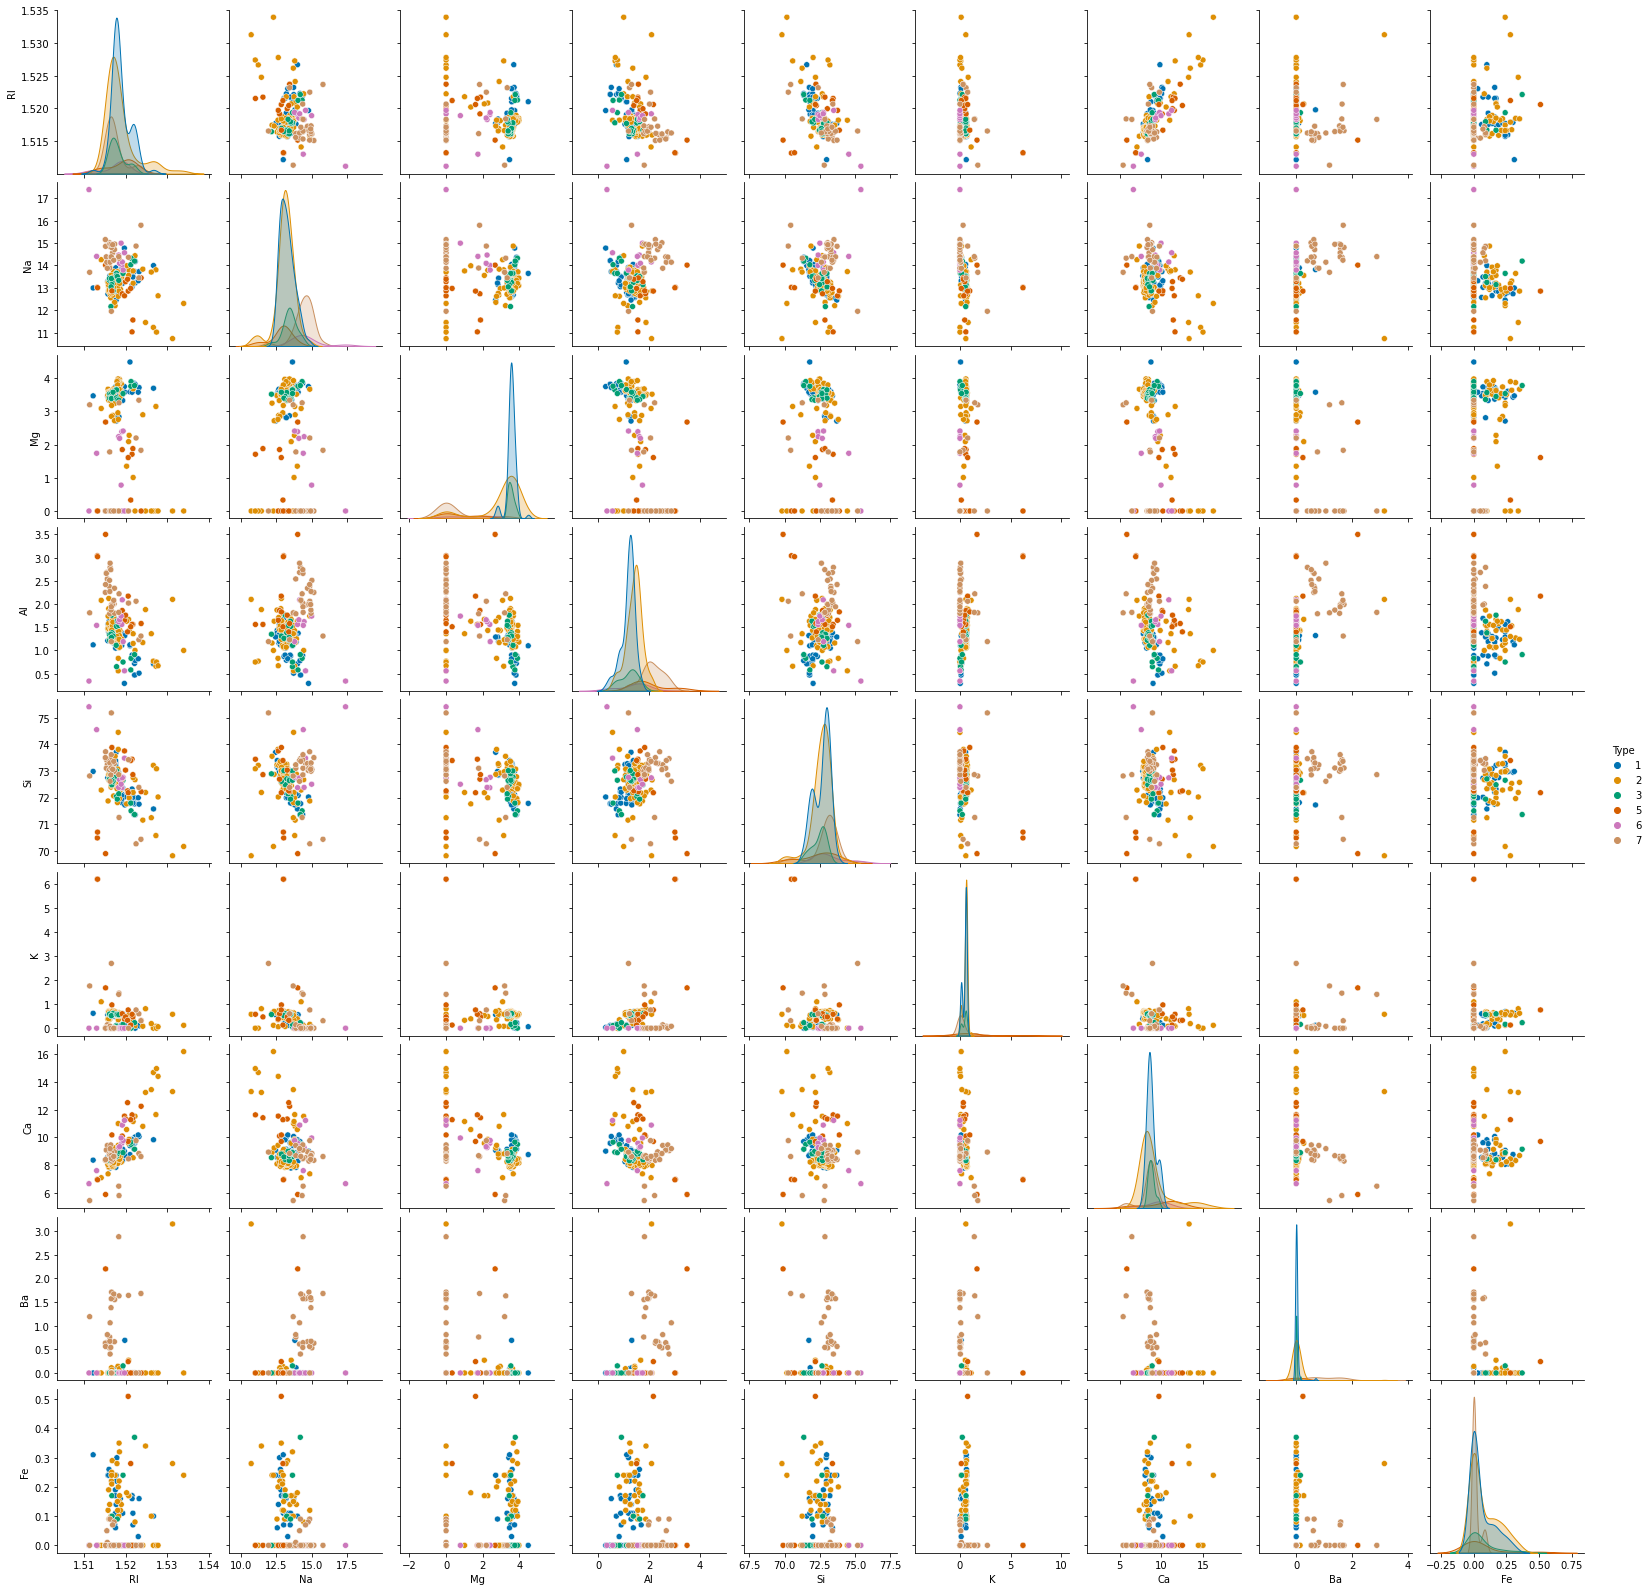

In [6]:
sns.pairplot(df, hue="Type", palette='colorblind')

## Podział danych na dwa zbiory - zbiór uczący oraz zbiór testowy.
### zbiory te zostaną wykorzystane w czasie tworzenia i testowania modeli.

In [7]:
feature=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']   # kolumny które określają szkło
X = df[feature]
y = df.Type   # Type odpowiada za typ szkła - jest to etykieta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Tworzenie drzewa klasyfikacyjnego

In [8]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


#### Poniżej przedstawiono dokładność tej metody

In [9]:
errorDf=pd.DataFrame(columns=['Algorithm','ErrorType','Value']) # dataframe reprezentujący wartości błędów, zostanie wykorzystany w porównaniu różnych metod.
errorDf.loc[0]=['Decision Tree', 'Accuaracy', metrics.accuracy_score(y_test, y_pred)] #y true, y predicted
errorDf.loc[1]=['Decision Tree', 'Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred)]
errorDf.loc[2]=['Decision Tree', 'Mean Squared Error', metrics.mean_squared_error(y_test, y_pred)]
errorDf.loc[3]=['Decision Tree', 'Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred))]
print("Accuracy:",errorDf.Value[0])
print('Mean Absolute Error:', errorDf.Value[1])
print('Mean Squared Error:', errorDf.Value[2])
print('Root Mean Squared Error:', errorDf.Value[3])

Accuracy: 0.6461538461538462
Mean Absolute Error: 0.6307692307692307
Mean Squared Error: 1.646153846153846
Root Mean Squared Error: 1.2830252710503585


#### Poniżej zaprezentowano macierz pomyłek

<AxesSubplot:>

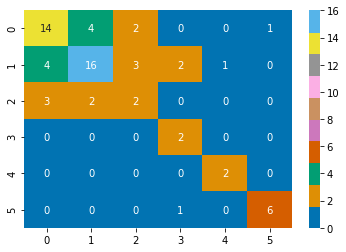

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=sns.color_palette('colorblind'))

## Tworzenie modelu Random Forrest

In [11]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

#### Poniżej przedstawiono dokładność tej metody

In [12]:
errorDf.loc[4]=['Random Forrest', 'Accuaracy', metrics.accuracy_score(y_test, y_pred)] #y true, y predicted
errorDf.loc[5]=['Random Forrest', 'Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred)]
errorDf.loc[6]=['Random Forrest', 'Mean Squared Error', metrics.mean_squared_error(y_test, y_pred)]
errorDf.loc[7]=['Random Forrest', 'Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred))]
print("Accuracy:",errorDf.Value[4])
print('Mean Absolute Error:', errorDf.Value[5])
print('Mean Squared Error:', errorDf.Value[6])
print('Root Mean Squared Error:', errorDf.Value[7])

Accuracy: 0.7076923076923077
Mean Absolute Error: 0.36923076923076925
Mean Squared Error: 0.5230769230769231
Root Mean Squared Error: 0.723240570679579


#### Poniżej zaprezentowano macierz pomyłek

<AxesSubplot:>

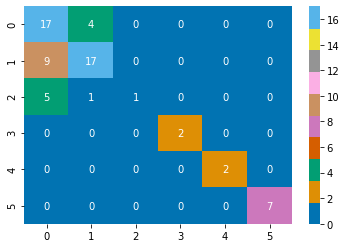

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=sns.color_palette('colorblind'))

## Tworzenie modelu AdaBoost

In [14]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Poniżej przedstawiono dokładność tej metody

In [15]:
errorDf.loc[8]=['Ada Boost', 'Accuaracy', metrics.accuracy_score(y_test, y_pred)] #y true, y predicted
errorDf.loc[9]=['Ada Boost', 'Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred)]
errorDf.loc[10]=['Ada Boost', 'Mean Squared Error', metrics.mean_squared_error(y_test, y_pred)]
errorDf.loc[11]=['Ada Boost', 'Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred))]
print("Accuracy:",errorDf.Value[8]) 
print('Mean Absolute Error:', errorDf.Value[9])
print('Mean Squared Error:', errorDf.Value[10])
print('Root Mean Squared Error:', errorDf.Value[11])

Accuracy: 0.49230769230769234
Mean Absolute Error: 0.7230769230769231
Mean Squared Error: 1.4
Root Mean Squared Error: 1.1832159566199232


#### Poniżej zaprezentowano macierz pomyłek

<AxesSubplot:>

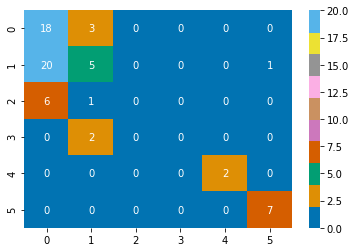

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=sns.color_palette('colorblind'))

## Zestawienie testowanych algorytmów

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuaracy'),
  Text(1, 0, 'Mean Absolute Error'),
  Text(2, 0, 'Mean Squared Error'),
  Text(3, 0, 'Root Mean Squared Error')])

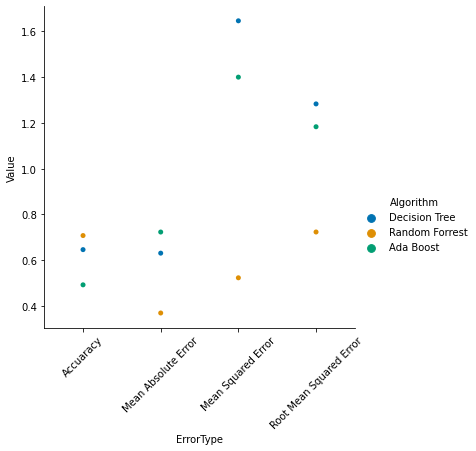

In [17]:
sns.catplot(
    data=errorDf, kind="swarm", #swarm/bar do wyboru - używam swarm, żeby spełnić wytyczne o 4 rodzajach wykresu ale bar ładniej wygląda
    x="ErrorType", y="Value", hue="Algorithm",
    ci="sd", palette="colorblind",
)
plt.xticks(rotation=45) #obrót osi X o 45 stopni

# Podsumowanie
### Metoda Random Forrest daje najlepszą dokładność predykcji.
### Dokładność Random Forrest wynosi około 70%.
### Wartości są zależne od losowania danych podczas podziału zbioru.
### Większy zbiór, który posiadałby identyczną liczbę próbek dla każdego typu szkła znacząco zmniejszyłby wpływ losowania danych przy podziale.
### Z testowanych metod, algorytm Ada Boost wykazuje najmniejszą skuteczność.